# Data Analysis
##### Analyzing the Pre-Processed Binary Encoded Data

Using standard python and pandas methods to examine and analyze the dataset

#### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import pre_processing as pp
import matplotlib.pyplot as plt

In [2]:
df = pp.preprocess_pipeline(r"Updated_Gaming_Survey_Responses.xlsx")

[INFO] Excel dataset loaded successfully. Shape: (500, 22)
[INFO] Basic cleaning applied.
[INFO] 'timestamp' column removed.
[INFO] Age column converted to binary columns -> Age_Teen, Age_Young_Adult, Age_Adult, Age_Mid_Adult.
[INFO] Location column converted to binary columns -> 'Location_India', 'Location_US', 'Location_Other'.
[INFO] Gender column cleaned.
[INFO] Gender column converted to binary columns.
[INFO] 'How often do you play video games?' converted to binary columns -> Gaming_Daily, Gaming_Weekly, Gaming_Monthly, Gaming_Rarely_Never.
[INFO] 'How many hours do you typically spend gaming in a week?' column cleaned and renamed -> 'Gaming_Hours'.
[INFO] 'Gaming_Hours' converted to binary columns.
[INFO] 'Which device do you play games on the most?(Check all that apply)' column cleaned and expanded into one-hot device columns.
[INFO] 'What genres of video games do you play? (Check all that apply)' column cleaned and expanded into one-hot genre columns.
[INFO] 'What is your favo

In [3]:
df.to_csv('data/processed_data.csv', index=False)

In [4]:
def dataframe_to_png(
    df,
    output_path="table.png",
    figsize=(10, 4),
    font_size=12,
    show=True,
    include_index=False
):
    if include_index:
        df = df.reset_index()

    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    table.scale(1, 1.5)

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    if show:
        plt.show()

    plt.close(fig)


#### Data Loading

In [5]:
# Replace with the actual path to your CSV
df = pd.read_csv(r"data/processed_data.csv")

# Show data as boolean values
df = df.astype(bool)

print("Dataset shape:", df.shape)
print("Sample transactions:")
df.head()

Dataset shape: (500, 67)
Sample transactions:


,Age_Teen,Age_Young_Adult,Age_Adult,Age_Mid_Adult,Location_India,Location_US,Location_Other,Gender_Female,Gender_Male,Gaming_Daily,...,Spend_lt100,Spend_100-500,Spend_500-1000,Spend_1000plus,Reason_Fun,Reason_Stress_Relief,Reason_Skills_Competition,Reason_Socialize,Reason_Learning,Reason_Other
0,True,False,False,False,True,False,False,False,True,True,...,True,False,False,False,True,True,False,False,False,False
1,False,True,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,False,True,False,False,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,False,False,False,False
4,True,False,False,False,True,False,False,True,False,True,...,True,False,False,False,True,True,True,True,False,False


#### Let:
- $ I = \{ i_1, i_2, ... , i_m \} $ be the set of all items
- $ D = \{ T_1, T_2, ... , T_N \} $ be the transaction database
- $ N = | D | $ be the number of transactions

## Analysis

### Item supports

$ \text{count}(i) = \sum _{t=1}^N 1(i \in T) $

$ \text{support}(i) = \frac{\text{count(i)}}{\text{N}} $

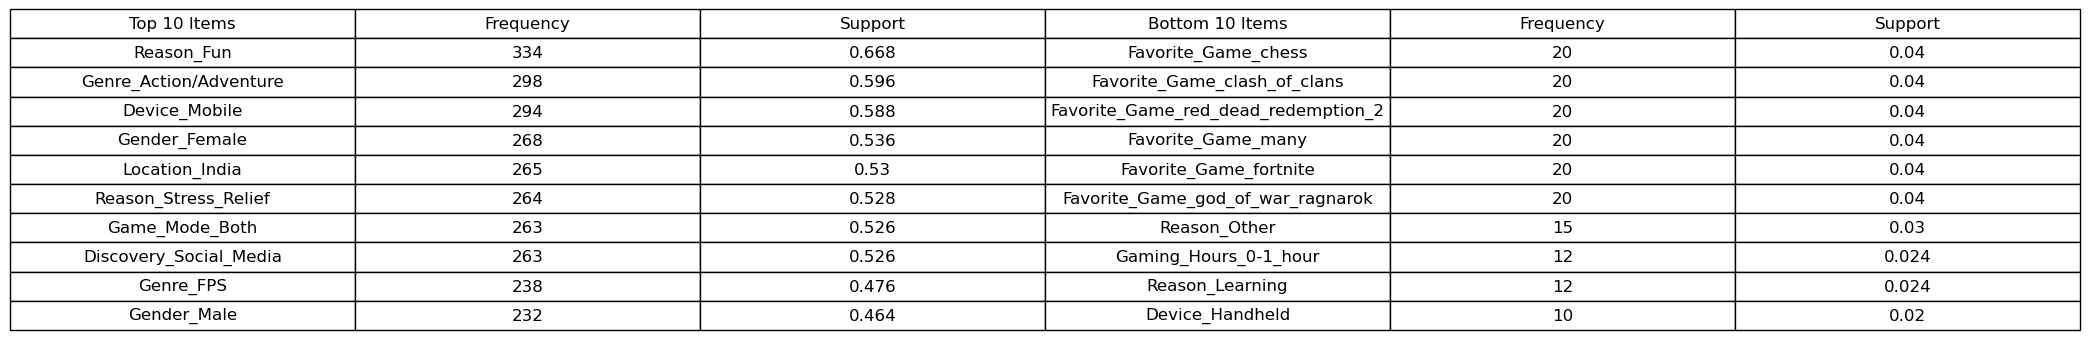

In [6]:
def get_item_supports(df: pd.DataFrame) -> pd.DataFrame:
    freq_support = pd.DataFrame({
        "Frequency": df.sum(),
        "Support": df.mean()
    }).sort_values("Frequency", ascending=False)

    top_10 = freq_support.head(10).reset_index()
    bottom_10 = freq_support.tail(10).reset_index()

    top_10.rename(columns={"index": "Top 10 Items"}, inplace=True)
    bottom_10.rename(columns={"index": "Bottom 10 Items"}, inplace=True)

    combined = pd.concat([top_10, bottom_10], axis=1)

    return freq_support, combined, top_10, bottom_10

freq_support, combined, top_10, bottom_10 = get_item_supports(df)

dataframe_to_png(combined, "data/item_support_table.png", figsize=(21, 3.5), show=True)

### Transaction lengths

$ \text{transaction length} = \sum_{j} X_{ij} $

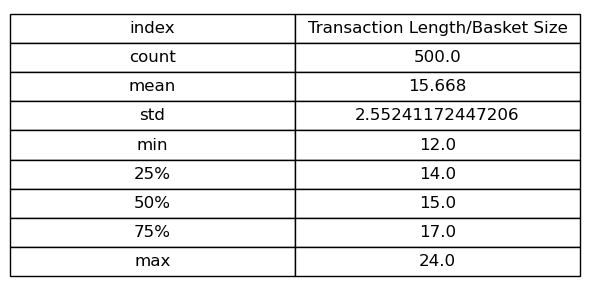

In [7]:
def get_transaction_lengths(df: pd.DataFrame) -> pd.Series:
    transaction_lengths = df.sum(axis=1)

    basket_size = transaction_lengths.describe().to_frame(name="Transaction Length/Basket Size")
    return basket_size

basket_size = get_transaction_lengths(df)
dataframe_to_png(basket_size, "data/transaction_length_summary.png", figsize=(6, 3), include_index=True)

### Sparsity/Density of the Dataset

$ \text{density} = \frac{\text{total ones}}{N \times M} $

In [8]:
def find_sparsity_density(df: pd.DataFrame, metric: str = "sparsity") -> float:

    total_entries = df.shape[0] * df.shape[1]
    total_ones = df.values.sum()

    density = (total_ones / total_entries)
    sparsity = 1 - density

    if metric == "sparsity":
        print("Sparsity:", sparsity)
        return sparsity
    elif metric == "density":
        print("Density:", density)
        return density

find_sparsity_density(df, metric="sparsity")
find_sparsity_density(df, metric="density")

Sparsity: 0.7661492537313432
Density: 0.2338507462686567


np.float64(0.2338507462686567)

### Sample Transactions

In [9]:
transaction = df.loc[5]
items_in_transaction = transaction[transaction].index.tolist()

print(items_in_transaction)

['Age_Young_Adult', 'Location_India', 'Gender_Male', 'Gaming_Weekly', 'Gaming_Hours_1-5_hours', 'Device_Mobile', 'Genre_Sports', 'Favorite_Game_efootball', 'Discovery_Social_Media', 'Game_Mode_Both', 'Spend_lt100', 'Reason_Fun']


In [10]:
transaction = df.loc[255]
items_in_transaction = transaction[transaction].index.tolist()

print(items_in_transaction)

['Age_Mid_Adult', 'Location_US', 'Gender_Male', 'Gaming_Rarely_Never', 'Gaming_Hours_1-5_hours', 'Device_PC', 'Device_Console', 'Genre_Action/Adventure', 'Genre_MMO', 'Favorite_Game_moba_legends', 'Discovery_Friends_Family', 'Game_Mode_Both', 'Spend_1000plus', 'Reason_Fun', 'Reason_Skills_Competition', 'Reason_Socialize']


#### Reducing the Sparsity

In [11]:
pruned_df, dropped = pp.prune_items_by_support(df, min_support=0.10)
find_sparsity_density(pruned_df, metric="sparsity")

Support threshold: 0.1
Items kept: 43
Items dropped: 24
Sparsity: 0.6627906976744187


np.float64(0.6627906976744187)